# Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known (e.g. `y_test`). The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

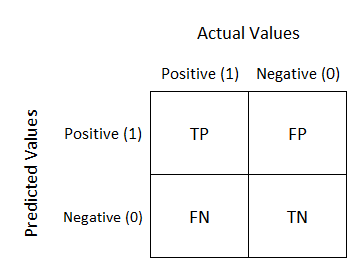

#### Touch on ROC / AUC

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv')

df.tail(2)

,height,weight,target,type
198,56.0,89.0,1.0,horse
199,58.0,98.0,1.0,horse


In [2]:
from sklearn.model_selection import train_test_split

X = df[['height', 'weight']]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
X_train.tail(1)

,height,weight
103,56.0,111.0


In [5]:
y_test.tail(1)

99    0.0
Name: target, dtype: float64

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
from sklearn.metrics import confusion_matrix

# make predictions
preds = lr.predict(X_test)

# make confusion matrix
confusion_matrix(y_test, preds)

array([[30,  4],
       [ 0, 26]])

- TP = predicted horse, is horse
- FP = predicted horse, is dog
- TN = predicted dog, is dog
- FN = predicted dog, is horse

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)  # doesn't tell us as much

0.9333333333333333

#### Visualize the Confusion Matrix

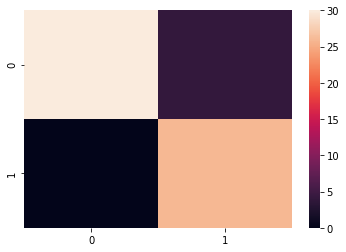

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

preds = lr.predict(X_test)

sns.heatmap(confusion_matrix(y_test, preds))

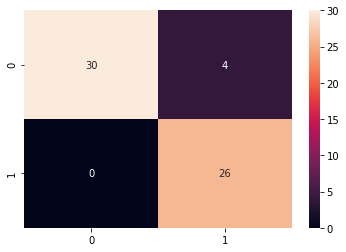

In [16]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

Reference: https://github.com/faro7ah/LogesticRegression_ML/blob/main/weekend_project_ML1_case_study_setup.ipynb

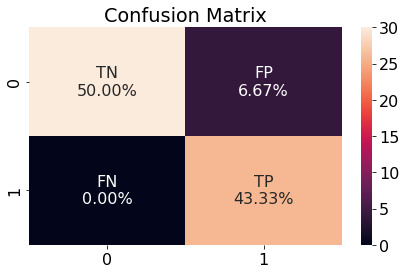

In [42]:
import numpy as np
import matplotlib.pyplot as plt

preds = lr.predict(X_test)
cf = confusion_matrix(y_test, preds)

names =  ['TN', 'FP', 'FN','TP']
# make %s seen in graph
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");  # make it happen

## another way...
Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

Source: https://github.com/scikit-learn/scikit-learn/blob/b3ea3ed6a/sklearn/metrics/_plot/confusion_matrix.py#L165

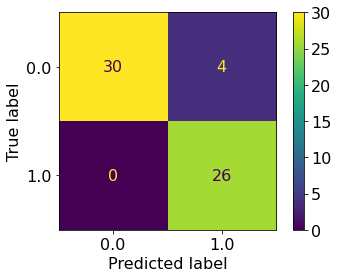

In [28]:
from sklearn.metrics import plot_confusion_matrix

lr = LogisticRegression()

lr.fit(X_train, y_train)

plot_confusion_matrix(lr, X=X_test, y_true=y_test)

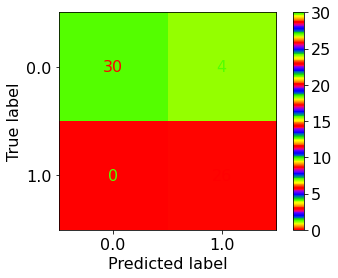

In [29]:
# be careful with colors
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='prism')

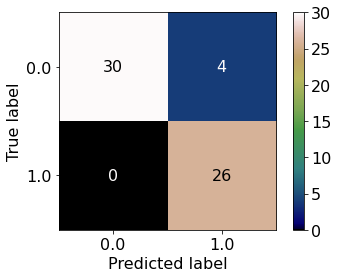

In [38]:
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='gist_earth')

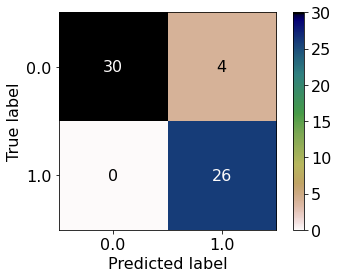

In [39]:
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='gist_earth_r')

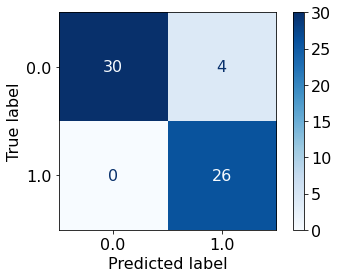

In [33]:
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='Blues')

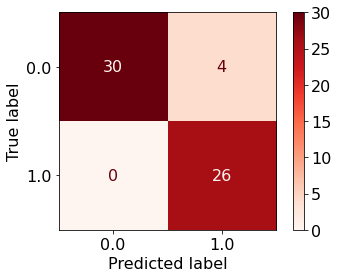

In [34]:
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='Reds')

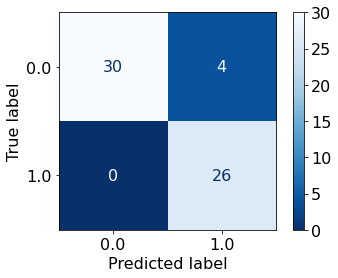

In [36]:
# Blues probably better than Blues_r
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='Blues_r')